In [2]:
import matplotlib.pyplot as plt

from config import config
from licence_plate_dataset_generator import LicensePlateDatasetGenerator
from license_plate_image_augmentator import LicensePlateImageAugmentator
from pyimagesearch.io import Hdf5DatasetLoader

In [3]:
loader = Hdf5DatasetLoader()
images, labels = loader.load(config.GLP_HDF5, shuffle=True, max_items=config.BATCH_SIZE)
background_images = loader.load(config.BACKGRND_HDF5, shuffle=True, max_items=10000)

augmentator = LicensePlateImageAugmentator(config.IMAGE_WIDTH, config.IMAGE_HEIGHT, background_images)

train_generator = LicensePlateDatasetGenerator(images, labels, config.IMAGE_WIDTH, config.IMAGE_HEIGHT,
                                               config.DOWNSAMPLE_FACTOR, config.MAX_TEXT_LEN, config.BATCH_SIZE, augmentator)

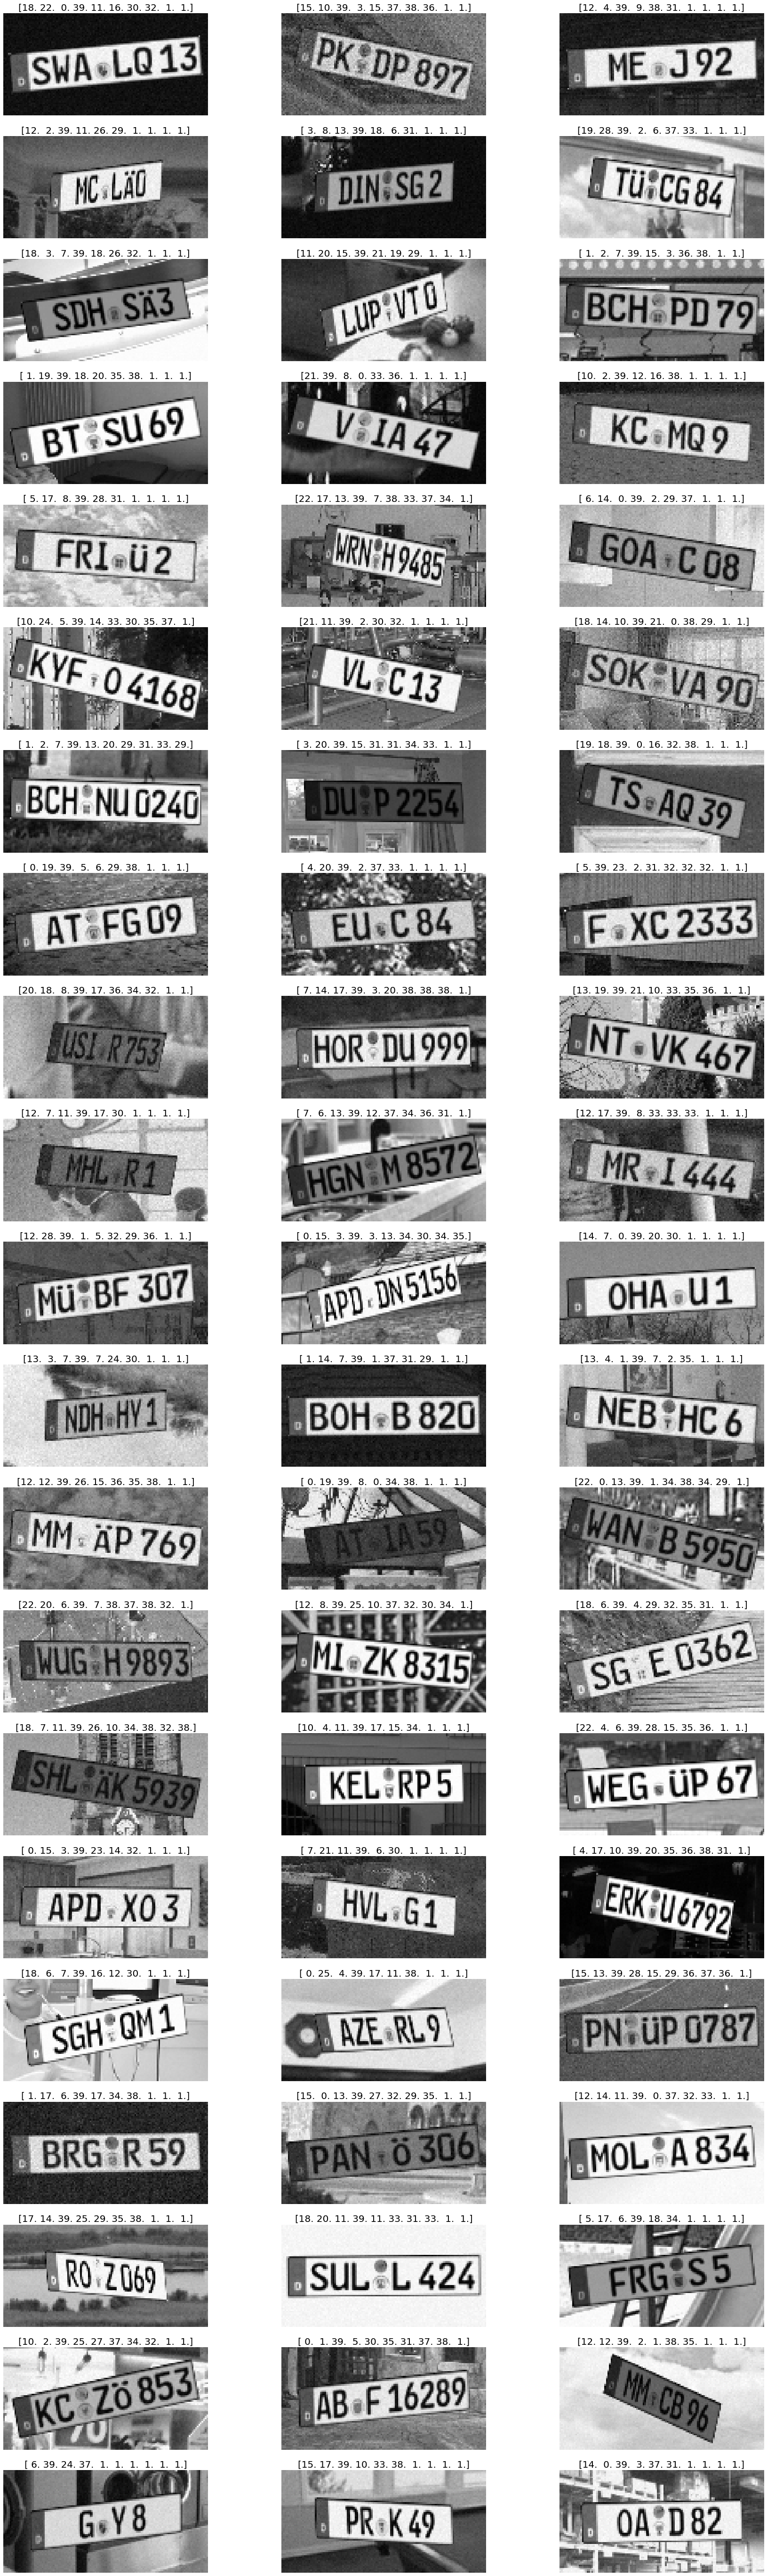

In [10]:
inputs = next(train_generator.generator())

cols = 3
rows = len(inputs["input"]) // cols

image_index = 0
f, axarr = plt.subplots(rows, cols, figsize=(30, 100))
for r in range(rows):
    for c in range(cols):
        image = inputs["input"][image_index].T.reshape(config.IMAGE_HEIGHT, config.IMAGE_WIDTH)
        axarr[r, c].axis("off")
        axarr[r, c].title.set_size(20)
        axarr[r, c].title.set_text(inputs["labels"][image_index])
        axarr[r, c].imshow(image, cmap='gray')
        image_index += 1

plt.show()